                                Unsupervised Learning with Weather Dataset

Importing Neccessary Packages and reading the csv file and printing the head of the csv file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file = pd.read_csv("weather.csv")
file.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


Listing the types of the columns in the dataframe.

In [12]:
file.dtypes

Outlook        object
Temperature    object
Humidity       object
Windy            bool
Play           object
dtype: object

Using the describe() function to find the count and unique values of the features in the dataset.

In [29]:
file.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,normal,False,yes
freq,5,6,7,8,9


Now, Mapping the categorical features in the dataset numerical(i.e to 1's and 0's).

In [3]:
file['Play'] = file['Play'].map({'no':0,'yes':1})
file.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,0
1,sunny,hot,high,True,0
2,overcast,hot,high,False,1
3,rainy,mild,high,False,1
4,rainy,cool,normal,False,1


In [4]:
file['Humidity'] = file['Humidity'].map({'normal':0,'high':1})
file.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,1,False,0
1,sunny,hot,1,True,0
2,overcast,hot,1,False,1
3,rainy,mild,1,False,1
4,rainy,cool,0,False,1


In [5]:
file['Windy']=file['Windy'].astype(int)

In [6]:
file.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,1,0,0
1,sunny,hot,1,1,0
2,overcast,hot,1,0,1
3,rainy,mild,1,0,1
4,rainy,cool,0,0,1


In [42]:
file.dtypes

Outlook        object
Temperature    object
Humidity        int64
Windy           int32
Play            int64
dtype: object

In [7]:
file['Outlook'] = file['Outlook'].map({'sunny':0,'overcast':1,'rainy':2})
file['Temperature'] = file['Temperature'].map({'hot':0,'mild':1,'cool':2})
file.head()

,Outlook,Temperature,Humidity,Windy,Play
0,0,0,1,0,0
1,0,0,1,1,0
2,1,0,1,0,1
3,2,1,1,0,1
4,2,2,0,0,1


After converting the features to numerical, viewing the resulting dataset in seaborn with violin plot.

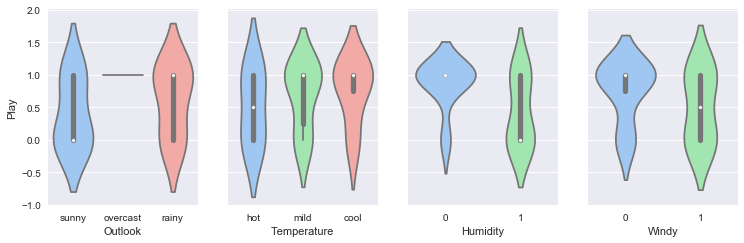

In [45]:
plot = sns.PairGrid(file,
                 x_vars=['Outlook','Temperature','Humidity','Windy'],
                 y_vars=['Play'],
                 aspect=.75, size=3.5)
plot.map(sns.violinplot, palette="pastel");

Applying the Principal Component Analysis (PCA) to the dataset to reduce the 4 features to 2 features and applying the KMeans algorith with 5 clusters and plotting them in the scatter plot with cenroids.
One of the Evaluation metric - Silhouette_Score :
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

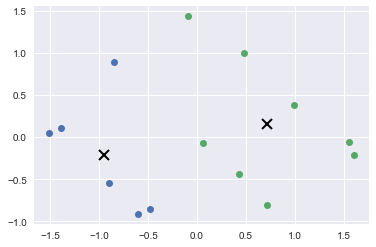

0.393344159553


In [17]:
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn import metrics

pca = PCA(n_components=2).fit(file)
pca_2d = pca.transform(file)

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(pca_2d)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = pca_2d[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=2.0)
plt.show()
print(metrics.silhouette_score(pca_2d,labels,metric='euclidean'))
